In [36]:
import numpy as np
import pandas as pd
import pandas_datareader as web

import matplotlib.pyplot as plt
import seaborn as sns

In [155]:
#TODO: Fazer funcao
def calc_returns(df, datec, valc):
    df.sort_values(by=datec, ascending=False, inplace=True)
    
    return df[valc].diff(-1)/df[valc].shift(-1)

def cum_returns(values):
    return np.cumprod(1 + values) - 1

In [168]:
df = pd.read_csv('../data/Petrobras PETR3 - Histórico  InfoMoney.csv')
df['FECHAMENTO'] = df['FECHAMENTO'].str.replace(',','.').astype(float)

df['DATA'] = pd.to_datetime(df['DATA'], format='%d/%m/%Y')
df.sort_values(by='DATA',ascending=False,inplace=True)

df['RETORNOS'] = calc_returns(df,datec='DATA',valc='FECHAMENTO')

df.sort_values(by='DATA', ascending=True, inplace=True)
df['RETORNOS_ACUMULADOS'] = cum_returns(df['RETORNOS'])

In [169]:
df.set_index('DATA', inplace=True)
df

,ABERTURA,FECHAMENTO,VARIAÇÃO,MÍNIMO,MÁXIMO,VOLUME,RETORNOS,RETORNOS_ACUMULADOS
DATA,,,,,,,,
2019-10-10,"26,06",26.17,"0,48","25,96","26,44","144,83M",NaN,NaN
2019-10-11,"26,38",26.56,"1,48","26,36","26,84","203,10M",0.014903,0.014903
2019-10-14,"26,56",26.71,"0,58","26,25","26,76","106,70M",0.005648,0.020634
2019-10-15,"26,74",27.07,"1,35","26,70","27,28","194,15M",0.013478,0.034391
2019-10-16,"27,16",27.45,"1,40","26,85","27,47","234,53M",0.014038,0.048911
...,...,...,...,...,...,...,...,...
2021-10-04,"28,41",29.38,"2,44","28,38","29,44","583,66M",0.024407,0.122660
2021-10-05,"29,50",29.87,"1,67","29,49","30,13","455,55M",0.016678,0.141383
2021-10-06,"29,57",29.14,"-2,44","29,00","29,75","436,20M",-0.024439,0.113489


<AxesSubplot:xlabel='DATA'>

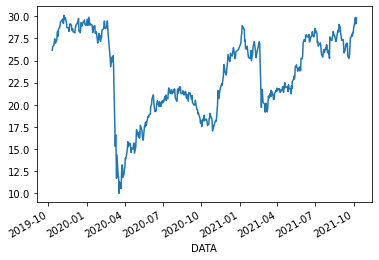

In [165]:
df['FECHAMENTO'].plot()

<AxesSubplot:xlabel='DATA'>

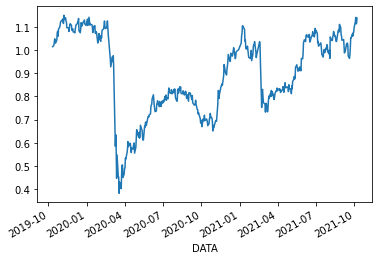

In [166]:
(df['RETORNOS_ACUMULADOS'] + 1).plot()

<AxesSubplot:xlabel='DATA'>

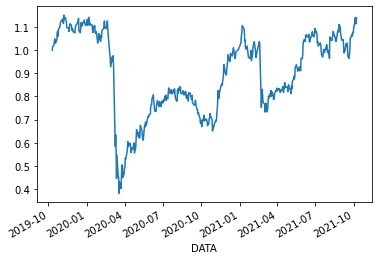

In [175]:
(df['FECHAMENTO']/df['FECHAMENTO'].iloc[0]).plot()

In [177]:
(df['FECHAMENTO']/df['FECHAMENTO'].iloc[0])

DATA
2019-10-10    1.000000
2019-10-11    1.014903
2019-10-14    1.020634
2019-10-15    1.034391
2019-10-16    1.048911
                ...   
2021-10-04    1.122660
2021-10-05    1.141383
2021-10-06    1.113489
2021-10-07    1.115781
2021-10-08    1.138326
Name: FECHAMENTO, Length: 495, dtype: float64

In [178]:
(df['RETORNOS_ACUMULADOS'] + 1)

DATA
2019-10-10         NaN
2019-10-11    1.014903
2019-10-14    1.020634
2019-10-15    1.034391
2019-10-16    1.048911
                ...   
2021-10-04    1.122660
2021-10-05    1.141383
2021-10-06    1.113489
2021-10-07    1.115781
2021-10-08    1.138326
Name: RETORNOS_ACUMULADOS, Length: 495, dtype: float64

<AxesSubplot:xlabel='DATA'>

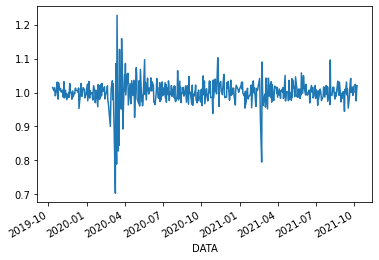

In [170]:
(df['RETORNOS'] + 1).plot()